In [4]:
from math import e, factorial,log, gamma, sqrt, floor
from matplotlib import pyplot as pt
from datetime import datetime

In [5]:
def exp_dif(lam, maxK,start=0):
    return [lam*(e**(-lam*k)) for k in range(start, maxK)]

In [9]:
f1 = open("r4-d0-result.txt")
raw1 = f1.read()
f1.close()
f2 = open("r4-d1-result.txt")
raw2 = f2.read()
f2.close()
f3 = open("sent-res-0.txt")
mod_sent = f3.readlines()
f3.close()

In [10]:
      
ToA = []    

for i in range(len(raw1)):
    if raw1[i] == 'B':# and raw2[i]=='S':
        ToA.append(i)

dif = []
for j in range(1,len(ToA)):
    dif.append(ToA[j]-ToA[j-1])

dist = {}

for d in dif:
    try:
        dist[d] += 1
    except:
        dist[d] = 1

x = sorted(dist.keys())
y = []
for t in x:
    y.append(dist[t]/len(ToA))

print(max(dist.values()))

print(y)
print(x)



2222886
[0.6668386596665515, 0.2221880569460823, 0.07389719238426996, 0.024654796549780422, 0.008226565178797223, 0.002785986610344959, 0.000942561637741344, 0.00031198730211680386, 9.689605633050735e-05, 3.869842497410356e-05, 1.2299499410373997e-05, 2.699890114472341e-06, 2.699890114472341e-06, 5.999755809938535e-07]
[30, 90, 150, 210, 270, 330, 390, 450, 510, 570, 630, 690, 750, 810]


In [11]:
ToA_mod = []

for line in mod_sent:
    l_clean = line.replace('(','').replace(')','').replace("'",'')
    ls = l_clean.split(',')
    T = datetime.strptime(ls[0],"%H:%M:%S.%f")
    ToA_mod.append(T)

dif_mod = []

for i in range(1,len(ToA_mod)):
    dT = ToA_mod[i] - ToA_mod[i-1]
    dif_mod.append(dT.total_seconds()*1000)



(array([1.11139810e-02, 3.70313539e-03, 1.23162024e-03, 4.10913399e-04,
       1.37109461e-04, 4.64331241e-05, 1.57093653e-05, 5.19978993e-06,
       1.61493476e-06, 6.44973943e-07, 2.04991718e-07, 4.49981821e-08,
       5.49977781e-08]), array([ 30.,  90., 150., 210., 270., 330., 390., 450., 510., 570., 630.,
       690., 750., 810.]), <a list of 13 Patch objects>)


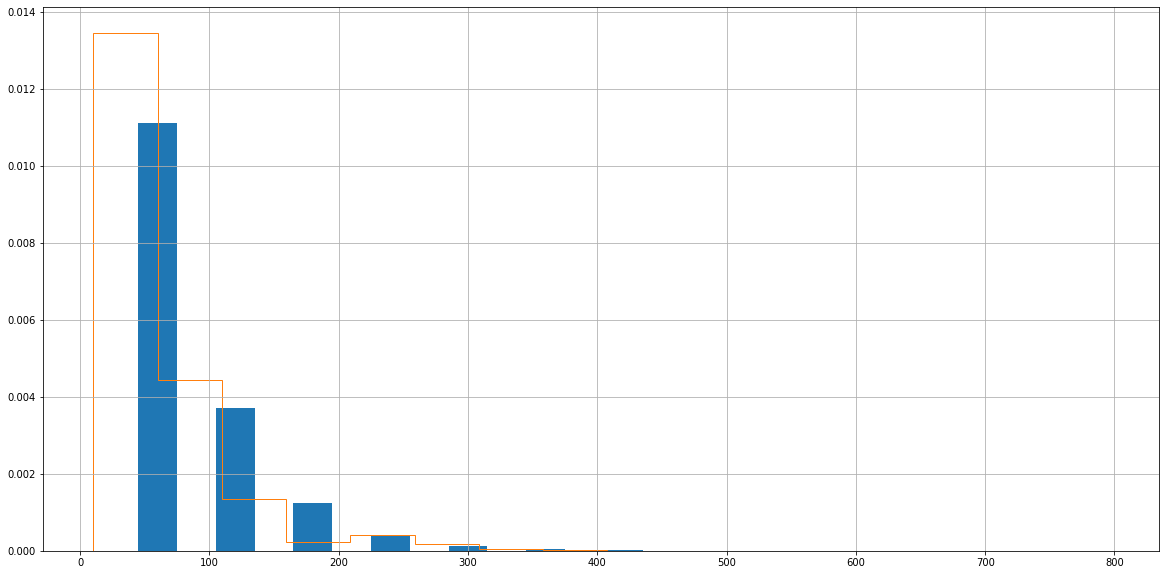

In [12]:
pt.rcParams["figure.figsize"] = (20,10)
h = pt.hist(dif,bins=13,density=True,histtype='bar',align='mid', rwidth=0.5)
print(h)
h_mod = pt.hist(dif_mod,bins=13,density=True,histtype='step',align='mid')
pt.grid(True)

pt.show()

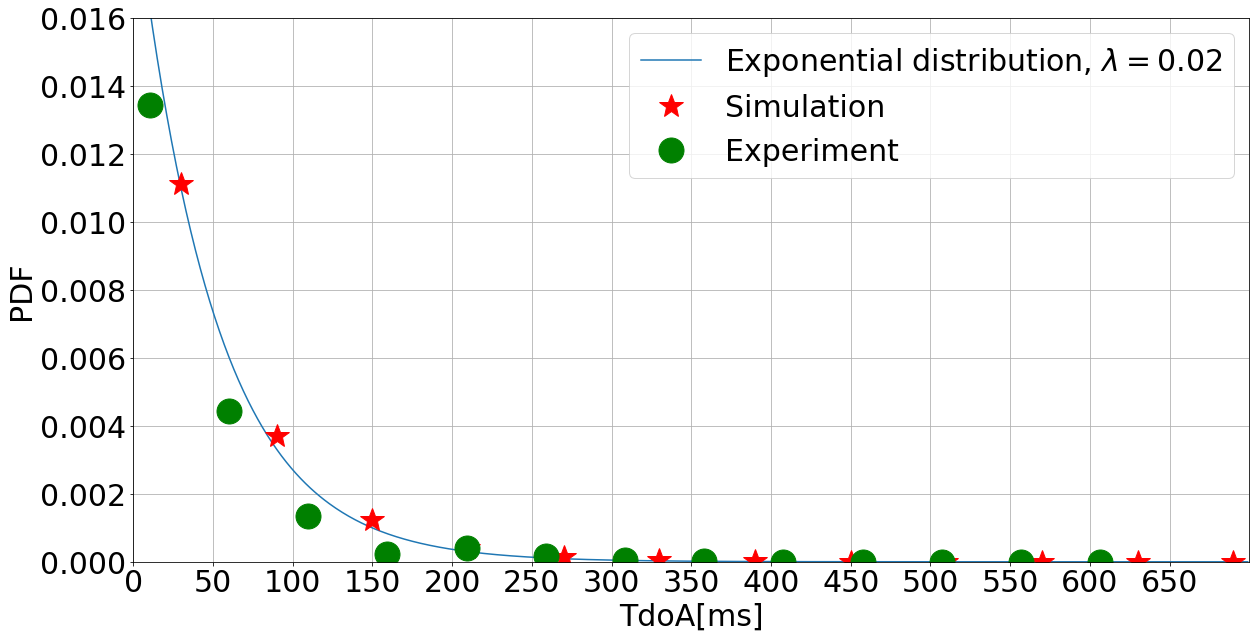

In [15]:
v = exp_dif(0.02,700,start=0)
pt.plot(range(0,700),v,markersize=16,label="Exponential distribution, $\lambda={}$".format(v[0]))
pt.plot(h[1][0:13],h[0][0:13],'r*',markersize=25, label="Simulation")
pt.plot(h_mod[1][0:13],h_mod[0][0:13],'go',markersize=25, label="Experiment")
pt.xlabel(r'TdoA[ms]', fontsize = 30)
pt.ylabel(r'PDF', fontsize = 30)
pt.axis([0,700,0,0.016])
pt.xticks(range(0,700,50),fontsize=30)
pt.yticks(fontsize=30)
pt.grid(True)
pt.legend(fontsize=30)
pt.savefig('toa.pdf',format='pdf',dpi=300, bbox_inches='tight')
pt.show()

In [14]:
with open('dist.txt','w') as f:
    for p in x:
        f.write(str(p)+'\t')
    f.write('\n')

    for p in y:
        f.write(str(p)+'\t')